# Machine Learning Optimization: 2 Tiers calculated on State and 4 Features

The purpose of this notebook is to optimize the models run in ML_final_analysis by changing the Feature set. 

**Feature Engineering**
We will create the feature set with
* total_restaurants
* total_reviews
* num_rest_categories
* ave_stars

The rationale behind this approach is because we saw when we ran the random forest classifier in ML_final_analysis, that these features were given the highest importance 

In [63]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [64]:
#Read in the CSV and read in the data
df = pd.read_csv("../Neighborhood/neighborhood_two_tier_state_final.csv")

In [65]:
df.head()

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,Average State House Price,Neighborhood Indicator,Neighborhood Tiers
0,1267.0,Williamstown,MA,Berkshire County,357029.0,23,1347.0,3.782609,1.0,2.0,0.0,4.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,11.0,3.0,1.0,23,488930.0,0.730225,2
1,2134.0,Boston,MA,Suffolk County,620830.0,1,2.0,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,488930.0,1.269773,1
2,2886.0,Warwick,RI,Kent County,315398.0,1,28.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,315398.0,1.000000,2
3,3079.0,Salem,NH,Rockingham County,458081.0,1,1.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,370626.0,1.235966,1
4,3276.0,Northfield,NH,Merrimack County,283171.0,1,1.0,2.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,370626.0,0.764034,2


In [66]:
df.shape

(13988, 29)

In [68]:
#df.City.value_counts()

In [69]:
#df_ml = df.groupby('City').filter(lambda x : len(x)>=10)
#df_ml.shape

In [70]:
df_ml.columns.to_list()

['postal_code',
 'City',
 'State',
 'CountyName',
 '2021',
 'total_restaurants',
 'total_reviews',
 'avg_rating',
 'total_delivery',
 'total_pickup',
 'total_rest_reservation',
 'total_price_1',
 'total_price_2',
 'total_price_3',
 'total_price_4',
 'total_0.0_stars',
 'total_1.0_stars',
 'total_1.5_stars',
 'total_2.0_stars',
 'total_2.5_stars',
 'total_3.0_stars',
 'total_3.5_stars',
 'total_4.0_stars',
 'total_4.5_stars',
 'total_5.0_stars',
 'num_rest_types',
 'Average State House Price',
 'Neighborhood Indicator',
 'Neighborhood Tiers']

# Feature Engineering

In [71]:
#Drop counties that have less than 10 zipcodes
df = df.groupby('CountyName').filter(lambda x : len(x)>10)
df.shape

(9952, 29)

### Create Scaled Training and Test data

In [72]:
# Create the features
X = df[['total_restaurants',
 'total_reviews',
 'avg_rating',
 'num_rest_types']]
X.head()

,total_restaurants,total_reviews,avg_rating,num_rest_types
1,1,2.0,4.500000,0
2,1,28.0,2.000000,1
5,41,322.0,3.780488,21
6,13,40.0,3.500000,9
7,19,82.0,3.736842,19


In [73]:
X.describe()

,total_restaurants,total_reviews,avg_rating,num_rest_types
count,9952.000000,9952.000000,9952.000000,9952.000000
mean,19.570941,3004.343047,3.860911,18.447247
std,24.742448,8428.358978,0.542880,16.419870
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,50.000000,3.543323,5.000000
50%,10.000000,454.000000,3.945553,14.000000
75%,27.000000,2354.250000,4.166667,28.000000
max,230.000000,272071.000000,5.000000,96.000000


In [74]:
#Create target variable
y = df['Neighborhood Tiers']
y.head()

1    1
2    2
5    1
6    1
7    2
Name: Neighborhood Tiers, dtype: int64

In [75]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")


y_train: Counter({1: 4229, 2: 3235})
y_test: Counter({1: 1365, 2: 1123})


In [76]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [77]:
X_train_scaled[:, 2]

array([-0.04248916,  0.64976084,  0.01158969, ...,  0.56234013,
        0.59015581,  1.17428506])

In [78]:
X_test_scaled[:,2]

array([-0.42114279, -0.20259103, -1.12050843, ...,  0.48584701,
        0.25636767,  0.12523661])

# Create a logistic regression model

In [79]:
# Logistic Regression
classifier_LR = LogisticRegression(solver='lbfgs', random_state=1, max_iter = 200)
classifier_LR

LogisticRegression(max_iter=200, random_state=1)

In [80]:
# Train the data
classifier_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [81]:
# Predict outcomes for test data set
y_pred_LR = classifier_LR.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_LR, "Actual": y_test}).head(20)

,Prediction,Actual
8238,1,1
2291,2,1
10958,2,1
5677,2,2
13335,1,1
3742,1,1
12814,1,2
351,2,1
1149,1,1
8418,1,2


In [82]:
#Calculate the Balanced Accuracy score
y_pred = classifier_LR.predict(X_test_scaled)
acc_LR = accuracy_score(y_test, y_pred_LR)
acc_LR

0.5856109324758842

In [83]:
#calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

0.41438906752411575

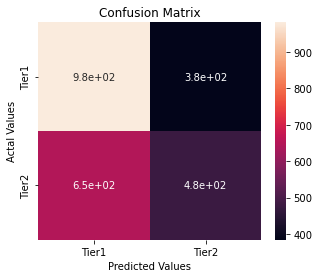

In [85]:
# Display the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LR = pd.DataFrame(cm_LR,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LR, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [86]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       0.60      0.72      0.66      1365
           2       0.55      0.42      0.48      1123

    accuracy                           0.59      2488
   macro avg       0.58      0.57      0.57      2488
weighted avg       0.58      0.59      0.58      2488



# Create Balanced Random Forest Classifier

In [87]:
# Resample the training data with the BalancedRandomForestClassifier
model_RF = BalancedRandomForestClassifier(n_estimators=50, random_state=1) 
model_RF.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=50, random_state=1)

In [88]:
# Calculated the balanced accuracy score
y_pred_RF = model_RF.predict(X_test_scaled)

accuracy_score(y_test, y_pred_RF)


0.625

In [89]:
#calculate Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_RF

0.375

In [90]:
pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test}).head(20)

,Prediction,Actual
8238,1,1
2291,2,1
10958,1,1
5677,2,2
13335,2,1
3742,1,1
12814,1,2
351,1,1
1149,1,1
8418,1,2


In [91]:
# Calculate feature importance in the Random Forest model.
importances = model_RF.feature_importances_
importances

array([0.16175873, 0.42462862, 0.24496639, 0.16864627])

In [92]:
# We can sort the features by their importance.
sorted(zip(model_RF.feature_importances_, X.columns), reverse=True)


[(0.42462861704762195, 'total_reviews'),
 (0.24496639173663998, 'avg_rating'),
 (0.16864626511007072, 'num_rest_types'),
 (0.16175872610566747, 'total_restaurants')]

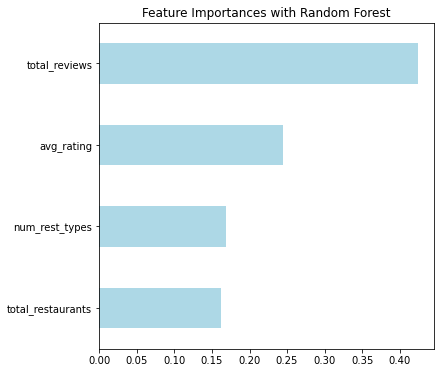

In [93]:
# Plot influential features based on Random Forest model:
influential_features = pd.Series(model_RF.feature_importances_, X.columns)
influential_features.nlargest(12).sort_values().plot(kind='barh', color='lightblue', figsize=(6,6))
plt.title('Feature Importances with Random Forest');


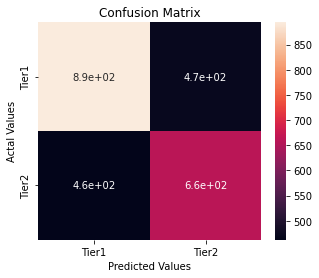

In [94]:
# Display the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_RF = pd.DataFrame(cm_RF,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_RF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [95]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       0.66      0.65      0.66      1365
           2       0.58      0.59      0.59      1123

    accuracy                           0.62      2488
   macro avg       0.62      0.62      0.62      2488
weighted avg       0.63      0.62      0.63      2488



# Create Easy Ensemble AdaBoost Classifier

In [96]:
# Train the EasyEnsembleClassifier
model_Ada = EasyEnsembleClassifier(n_estimators=75, random_state=1) 
model_Ada.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=75, random_state=1)

In [97]:
# Calculated the balanced accuracy score
y_pred_Ada = model_Ada.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_Ada)

0.6519360425860872

In [98]:
pd.DataFrame({"Prediction": y_pred_Ada, "Actual": y_test}).head(10)

,Prediction,Actual
8238,1,1
2291,1,1
10958,2,1
5677,2,2
13335,1,1
3742,1,1
12814,1,2
351,1,1
1149,1,1
8418,2,2


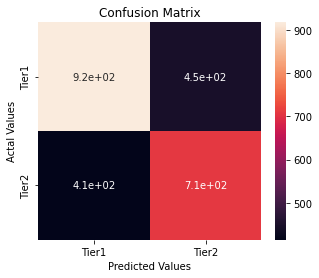

In [99]:
# Display the confusion matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_Ada = pd.DataFrame(cm_Ada,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_Ada, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [100]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           1       0.69      0.67      0.68      1365
           2       0.61      0.63      0.62      1123

    accuracy                           0.65      2488
   macro avg       0.65      0.65      0.65      2488
weighted avg       0.65      0.65      0.65      2488



# Create Gradient Boosting Classifier

In [101]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=4,
                                            max_depth=3,
                                            random_state=0)
    # Fit the model
    classifier_GBC.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier_GBC.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier_GBC.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.668
Accuracy score (validation): 0.652

Learning rate:  0.1
Accuracy score (training): 0.673
Accuracy score (validation): 0.654

Learning rate:  0.25
Accuracy score (training): 0.683
Accuracy score (validation): 0.659

Learning rate:  0.5
Accuracy score (training): 0.693
Accuracy score (validation): 0.655

Learning rate:  0.75
Accuracy score (training): 0.697
Accuracy score (validation): 0.644

Learning rate:  1
Accuracy score (training): 0.701
Accuracy score (validation): 0.652



In [102]:
# Choose a learning rate and create classifier
classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=4,
                                        max_depth=5,
                                        random_state=0)

# Fit the model
classifier_GBC.fit(X_train_scaled, y_train)

# Make Prediction
y_pred_GBC = classifier_GBC.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_GBC, "Actual": y_test}).head(20)

,Prediction,Actual
8238,1,1
2291,1,1
10958,1,1
5677,2,2
13335,2,1
3742,2,1
12814,1,2
351,1,1
1149,1,1
8418,1,2


In [103]:
accuracy_score(y_test, y_pred_GBC)

0.6314308681672026

/Users/ramyaramamurthy/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


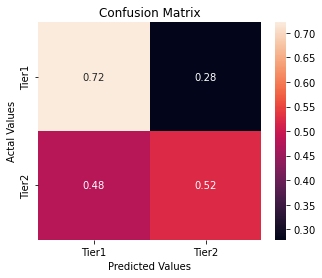

In [104]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GBC = pd.DataFrame(cm_GBC,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])
cm_df_GBC = cm_df_GBC.astype('float') / cm_df_GBC.sum(axis=1)[:, np.newaxis]
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GBC, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [105]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           1       0.65      0.72      0.68      1365
           2       0.61      0.52      0.56      1123

    accuracy                           0.63      2488
   macro avg       0.63      0.62      0.62      2488
weighted avg       0.63      0.63      0.63      2488



# Naive Bayes model

In [106]:
from sklearn.naive_bayes import GaussianNB
classifiers_bayes = GaussianNB()
classifiers_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [107]:
y_pred_bayes  =  classifiers_bayes.predict(X_test_scaled)

In [108]:
pd.DataFrame({"Prediction": y_pred_bayes, "Actual": y_test}).head(20)

,Prediction,Actual
8238,1,1
2291,2,1
10958,2,1
5677,2,2
13335,1,1
3742,1,1
12814,1,2
351,1,1
1149,2,1
8418,2,2


In [109]:
# Calculating the accuracy score
acc_score_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy Score : {acc_score_bayes}")

Accuracy Score : 0.5385852090032154


/Users/ramyaramamurthy/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


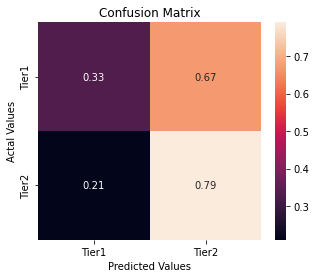

In [110]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_bayes = pd.DataFrame(cm_bayes,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

cm_df_bayes = cm_df_bayes.astype('float') / cm_df_bayes.sum(axis=1)[:, np.newaxis]
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_bayes, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [111]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.66      0.33      0.44      1365
           2       0.49      0.79      0.61      1123

    accuracy                           0.54      2488
   macro avg       0.58      0.56      0.52      2488
weighted avg       0.58      0.54      0.52      2488



In [112]:
# print the accuracy score of each model:
print('----------------------------------------')
print('Accuracy')
print('----------------------------------------')
print('Naive Bayes Test Accuracy: ', accuracy_score(y_test, y_pred_bayes)*100,'%')
print('Random Forest Test Accuracy: ', accuracy_score(y_test, y_pred_RF)*100,'%')
print('Adaboost Test Accuracy: ', accuracy_score(y_test, y_pred_Ada)*100,'%')
print('Gradient Boost Test Accuracy: ', accuracy_score(y_test, y_pred_GBC)*100,'%')
print('Logistic Regession Test Accuracy: ', accuracy_score(y_test, y_pred_LR)*100,'%')

# Print the F1 score of each model:
print('\n----------------------------------------')    
print('Weighted F1 Score')
print('----------------------------------------')
print('Naive Bayes F1 Score: ', f1_score(y_test, y_pred_bayes, average='weighted'))
print('Random Forest F1 Score: ', f1_score(y_test, y_pred_RF, average='weighted'))
print('Adaboost F1 Score: ', f1_score(y_test, y_pred_Ada, average='weighted'))
print('Gradient Boost F1 Score: ', f1_score(y_test, y_pred_GBC, average='weighted'))
print('Logistic Regession F1 Score: ', f1_score(y_test, y_pred_LR, average='weighted'))


----------------------------------------
Accuracy
----------------------------------------
Naive Bayes Test Accuracy:  53.85852090032154 %
Random Forest Test Accuracy:  62.5 %
Adaboost Test Accuracy:  65.39389067524117 %
Gradient Boost Test Accuracy:  63.14308681672026 %
Logistic Regession Test Accuracy:  58.561093247588424 %

----------------------------------------
Weighted F1 Score
----------------------------------------
Naive Bayes F1 Score:  0.516029977621867
Random Forest F1 Score:  0.6251281606230916
Adaboost F1 Score:  0.6543272249380296
Gradient Boost F1 Score:  0.6276025653420223
Logistic Regession F1 Score:  0.5763378102346595
